#***Twitter Credentials***

In [ ]:
import pandas as pd
data= {"name":['Alice','Bob','Tom','Smith','Jones','Ben'], "PhoneNumber":[123456,234567,34567,456789,567890,678901], "Age":[20,21,22,18,19,23],"DateOfBirth":['2000/12/12','1999/10/10','2001/10/19','1997/08/24','1998/08/08','2000/10/15'],"Branch":['CSE','ECE','IT','EEE','MECH','CIVIL'],"RegdNumber":[101,102,103,104,105,106],"Year":[1,2,2,3,4,1]}
df=pd.DataFrame(data)
print(df.loc[[5,1,3,2]].loc[1]["Age"])

21


In [ ]:
consumerKey = "CreWemtKA5Dn2DckuU8BNEXN0"
consumerSecret = "pLUPNc2GzgHTRknmr4LsTqx3BMvqyl9K8E2q8m0NyrxgzRDCPp"
accessToken = "1110524950547447808-7kKoaVpybCLlPkIJYmXn9oUxjtMkbO"
accessTokenSecret = "B4w7oUssV3Onqjxqvjp7lTFLjWWJHyKTGAULNaqSn05R1"

# ***IMPORTANT LIBRARIES***

In [ ]:
from tweepy import OAuthHandler               #Handles User Authentication
from tweepy import Stream                     #establishes a streaming session and routes messages to StreamListener instance
from tweepy.streaming import StreamListener   #Downloads twitter messages in real time
from tweepy import API                        #Provides access to the entire twitter RESTful API methods
from tweepy import Cursor                     #Enables Pagination in program
import numpy as np                            #For working with arrays
import pandas as pd                           #For data analysis
import matplotlib.pyplot as plt               #For plotting graphs
from textblob import TextBlob                 #For processing textual data
import re                                     #Library for Regular Expressions
import seaborn as sns                         #Plotting statistical graphs



# ***Analysing Tweets***

In [ ]:
print("Enter username ")
a=input()

Enter username 
narendramodi


In [ ]:
class TwitterClient():
    def __init__(self, twitter_user=None):                    #Authenticates Twitter User
        self.auth = TwitterAuthenticator().authenticate_twitter_app()
        self.twitter_client = API(self.auth)
        self.twitter_user = twitter_user

    def get_twitter_client_api(self):
        return self.twitter_client

    """def get_user_timeline_tweets(self, num_tweets):
        tweets = []
        for tweet in Cursor(self.twitter_client.user_timeline, id=self.twitter_user).items(num_tweets):
            tweets.append(tweet)
        return tweets

    def get_friend_list(self, num_friends):
        friend_list = []
        for friend in Cursor(self.twitter_client.friends, id=self.twitter_user).items(num_friends):
            friend_list.append(friend)
        return friend_list

    def get_home_timeline_tweets(self, num_tweets):
        home_timeline_tweets = []
        for tweet in Cursor(self.twitter_client.home_timeline, id=self.twitter_user).items(num_tweets):
            home_timeline_tweets.append(tweet)
        return home_timeline_tweets
"""
class TwitterAuthenticator():
    def authenticate_twitter_app(self):
        auth = OAuthHandler(consumer_key=consumerKey, consumer_secret=consumerSecret)
        auth.set_access_token(accessToken, accessTokenSecret)
        return auth
class TwitterStreamer():#Class for streaming and processing live tweets
    def __init__(self):
        self.twitter_autenticator = TwitterAuthenticator()
    def stream_tweets(self, fetched_tweets_filename, hash_tag_list):
        # This handles Twitter authetification and the connection to Twitter Streaming API
        listener = TwitterListener(fetched_tweets_filename)
        auth = self.twitter_autenticator.authenticate_twitter_app()
        stream = Stream(auth, listener)
        # This line filter Twitter Streams to capture data by the keywords:
        stream.filter(track=hash_tag_list)
class TwitterListener(StreamListener): #Basic listener that just prints received tweets to stdout.
    def __init__(self, fetched_tweets_filename):
        self.fetched_tweets_filename = fetched_tweets_filename
    def on_data(self, data):
        try:
            print(data)
            with open(self.fetched_tweets_filename, 'a') as tf:
                tf.write(data)
            return True
        except BaseException as e:
            print("Error on_data %s" % str(e))
        return True
    def on_error(self, status):
        if status == 420:     #Caused due to misconfigured files
            # Returning False on_data method in case rate limit occurs.
            return False
        print(status)

class TweetAnalyzer():                       #Functionality for analyzing and categorizing content from tweets.
    def tweets_to_data_frame(self, tweets):
        df = pd.DataFrame(data=[tweet.text for tweet in tweets], columns=['Tweets'])
        df['id'] = np.array([tweet.id for tweet in tweets])
        df['len'] = np.array([len(tweet.text) for tweet in tweets])
        df['date'] = np.array([tweet.created_at for tweet in tweets])
        df['source'] = np.array([tweet.source for tweet in tweets])
        df['likes'] = np.array([tweet.favorite_count for tweet in tweets])
        df['retweets'] = np.array([tweet.retweet_count for tweet in tweets])
        return df

if __name__ == '__main__':

    twitter_client = TwitterClient()
    tweet_analyzer = TweetAnalyzer()
    api = twitter_client.get_twitter_client_api()
    tweets = api.user_timeline(screen_name=a, count=20)   #username
    df = tweet_analyzer.tweets_to_data_frame(tweets)
    print(df.head(100))

                                               Tweets                   id  \
0   લકુલીશ પરંપરાના કુલગુરુ સ્વામિ રાજર્ષિ મુનિના ...  1564478732626460673   
1   Interacted with IFS Officer Trainees of the Ba...  1564294437072936960   
2   Saddened to see the devastation caused by the ...  1564254916134473728   
3   Greetings on National Sports Day and tributes ...  1564079378287546368   
4   Thank you Gujarat for the affection. Here are ...  1564078467280506881   
5   #TeamIndia put up a spectacular all-round perf...  1563953096254013440   
6   Have you taken part in the #MannKiBaat quiz ba...  1563914838673608705   
7   Addressing a programme marking the commemorati...  1563865412072120320   
8   Here are some more glimpses from Smriti Van. I...  1563849638549110784   
9   It was a very poignant visit to Smriti Van. My...  1563848715944747008   
10  कच्छ सिर्फ एक स्थान नहीं है, बल्कि ये एक स्पिर...  1563846371387576323   
11  There is agricultural success and industrial g...  156384554

# ***Visualising tweets***

Average length over all tweets 123.3


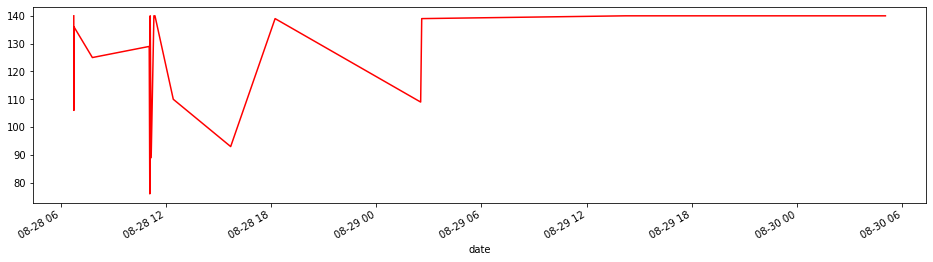

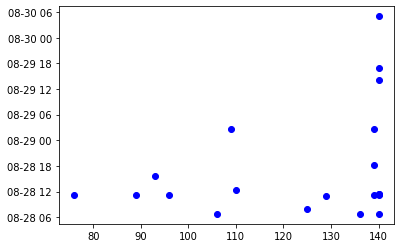

Number of likes for most liked tweet 212515


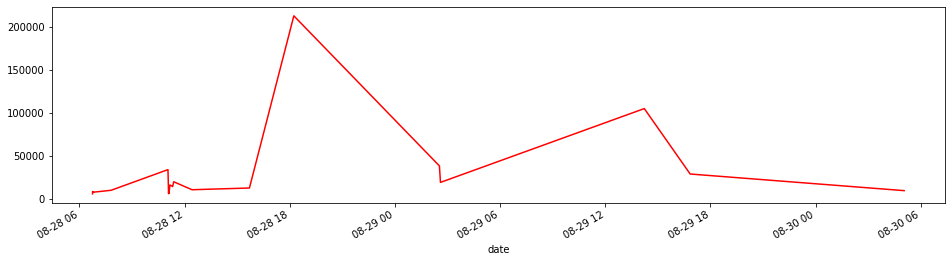

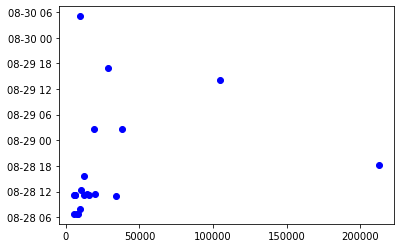

Number of retweets for the most retweeted tweet 33432


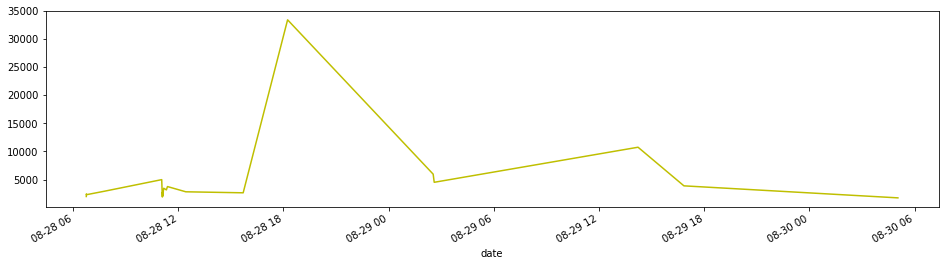

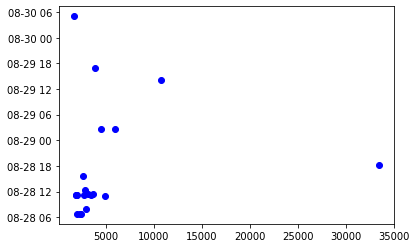

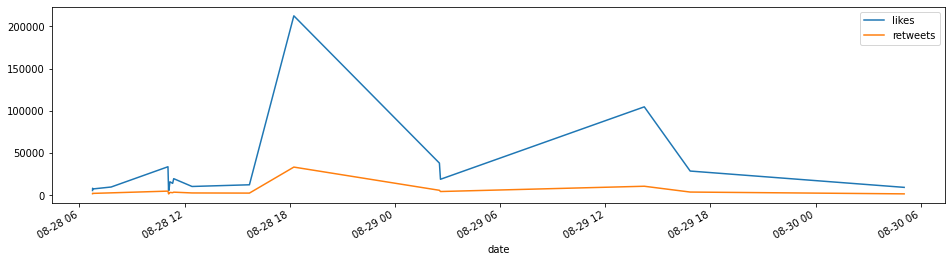

In [ ]:
if __name__ == '__main__':
    twitter_client = TwitterClient()
    tweet_analyzer = TweetAnalyzer()
    api = twitter_client.get_twitter_client_api()
    tweets = api.user_timeline(screen_name=a, count=20)   #username
    df = tweet_analyzer.tweets_to_data_frame(tweets)
    print("Average length over all tweets", np.mean(df['len']))
    time_likes = pd.Series(data=df['len'].values, index=df['date'])
    time_likes.plot(figsize=(16, 4), color='r')
    plt.show()
    x=data=df['len'].values
    y=index=df['date']
    plt.scatter(x, y,label='Scatter', color='b')
    plt.show()
    print("Number of likes for most liked tweet", np.max(df['likes']))
    time_favs = pd.Series(data=df['likes'].values, index=df['date'])
    time_favs.plot(figsize=(16, 4), color='r')
    plt.show()
    y=index=df['date']
    x=data=df['likes'].values
    plt.scatter(x, y,label='Scatter', color='b')
    plt.show()
    print("Number of retweets for the most retweeted tweet", np.max(df['retweets']))
    time_retweets = pd.Series(data=df['retweets'].values, index=df['date'])
    time_retweets.plot(figsize=(16, 4), color='y')
    plt.show()
    x=data=df['retweets'].values
    y=index=df['date']
    plt.scatter(x, y,label='Scatter', color='b')
    plt.show()
    time_likes = pd.Series(data=df['likes'].values, index=df['date'])
    time_likes.plot(figsize=(16, 4), label="likes", legend=True)
    time_retweets = pd.Series(data=df['retweets'].values, index=df['date'])
    time_retweets.plot(figsize=(16, 4), label="retweets", legend=True)
    plt.show()

# ***SENTIMENT ANALYSIS***

In [ ]:
class TweetAnalyzer(): #Analyzing and Categorizing content from tweets.
    def clean_tweet(self, tweet):
        return ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)", " ", tweet).split())
    def analyze_sentiment(self, tweet):
        analysis = TextBlob(self.clean_tweet(tweet))

        if analysis.sentiment.polarity > 0:
            return 1
        elif analysis.sentiment.polarity == 0:
            return 0
        else:
            return -1
    def tweets_to_data_frame(self, tweets):
        df = pd.DataFrame(data=[tweet.text for tweet in tweets], columns=['tweets'])
        df['id'] = np.array([tweet.id for tweet in tweets])
        df['len'] = np.array([len(tweet.text) for tweet in tweets])
        df['date'] = np.array([tweet.created_at for tweet in tweets])
        df['source'] = np.array([tweet.source for tweet in tweets])
        df['likes'] = np.array([tweet.favorite_count for tweet in tweets])
        df['retweets'] = np.array([tweet.retweet_count for tweet in tweets])
        return df
if __name__ == '__main__':

    twitter_client = TwitterClient()
    tweet_analyzer = TweetAnalyzer()
    api = twitter_client.get_twitter_client_api()
    tweets = api.user_timeline(screen_name=a, count=200)
    df = tweet_analyzer.tweets_to_data_frame(tweets)
    df['sentiment'] = np.array([tweet_analyzer.analyze_sentiment(tweet) for tweet in df['tweets']])

    print(df.head(200))

                                                tweets                   id  \
0    લકુલીશ પરંપરાના કુલગુરુ સ્વામિ રાજર્ષિ મુનિના ...  1564478732626460673   
1    Interacted with IFS Officer Trainees of the Ba...  1564294437072936960   
2    Saddened to see the devastation caused by the ...  1564254916134473728   
3    Greetings on National Sports Day and tributes ...  1564079378287546368   
4    Thank you Gujarat for the affection. Here are ...  1564078467280506881   
..                                                 ...                  ...   
195  I congratulate @DGukesh, @NihalSarin, @ArjunEr...  1557369658285498371   
196  The just-concluded 44th Chess Olympiad in Chen...  1557369654997164038   
197  On #WorldLionDay, I applaud all those who are ...  1557368750990508033   
198  Addressing Tiranga Yatra in Surat, Gujarat. ht...  1557337376933888001   
199  2G Ethanol Plant in Panipat will help boost pr...  1557326226313789440   

     len                date                source 

# ***Pie Chart***

Keyword:  narendramodi
Positive tweets 37.0 %
Negative tweets 3.0 %
Neutral Tweets 60.0 %


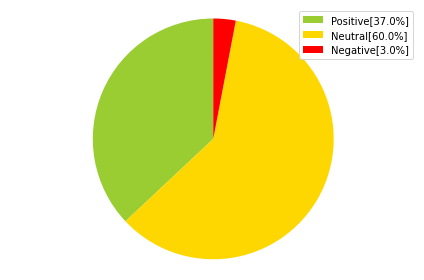

In [ ]:
(positive_tweet,negative_tweet,neutral_tweet,tot_tweet)=(0,0,0,0)
for i in range(100):
  if (df['sentiment'][i]==1):
    positive_tweet=positive_tweet+1
  elif (df['sentiment'][i]==-1):
    negative_tweet=negative_tweet+1
  elif (df['sentiment'][i]==0):
    neutral_tweet=neutral_tweet+1
tot_tweet=positive_tweet+negative_tweet+neutral_tweet
p=float(positive_tweet/tot_tweet)*100
n=float(negative_tweet/tot_tweet)*100
ne=float(neutral_tweet/tot_tweet)*100
print("Keyword: ",a)
print("Positive tweets", p,"%")
print("Negative tweets", n,"%")
print("Neutral Tweets", ne,"%")

labels = ['Positive['+str(p)+'%]', 'Neutral['+str(ne)+'%]', 'Negative['+str(n)+'%]' ]
sizes = [positive_tweet, neutral_tweet, negative_tweet]
colors = ['yellowgreen', 'gold', 'red']

patches, texts = plt.pie(sizes, colors=colors,startangle=90)
plt.legend(patches, labels, loc="best")
plt.axis('equal')
plt.tight_layout()
plt.show()
